# Lecture 2: Working with gene expression data

## Scientific Background

One of the most important challenges in all of science is **understanding the genetic architecture of complex traits**.

![mendelian trait](https://upload.wikimedia.org/wikipedia/commons/1/17/Punnett_square_mendel_flowers.svg)
(Wikipedia)


# Classical genetics
https://www.khanacademy.org/science/high-school-biology/hs-classical-genetics/hs-introduction-to-heredity/a/probabilities-in-genetics
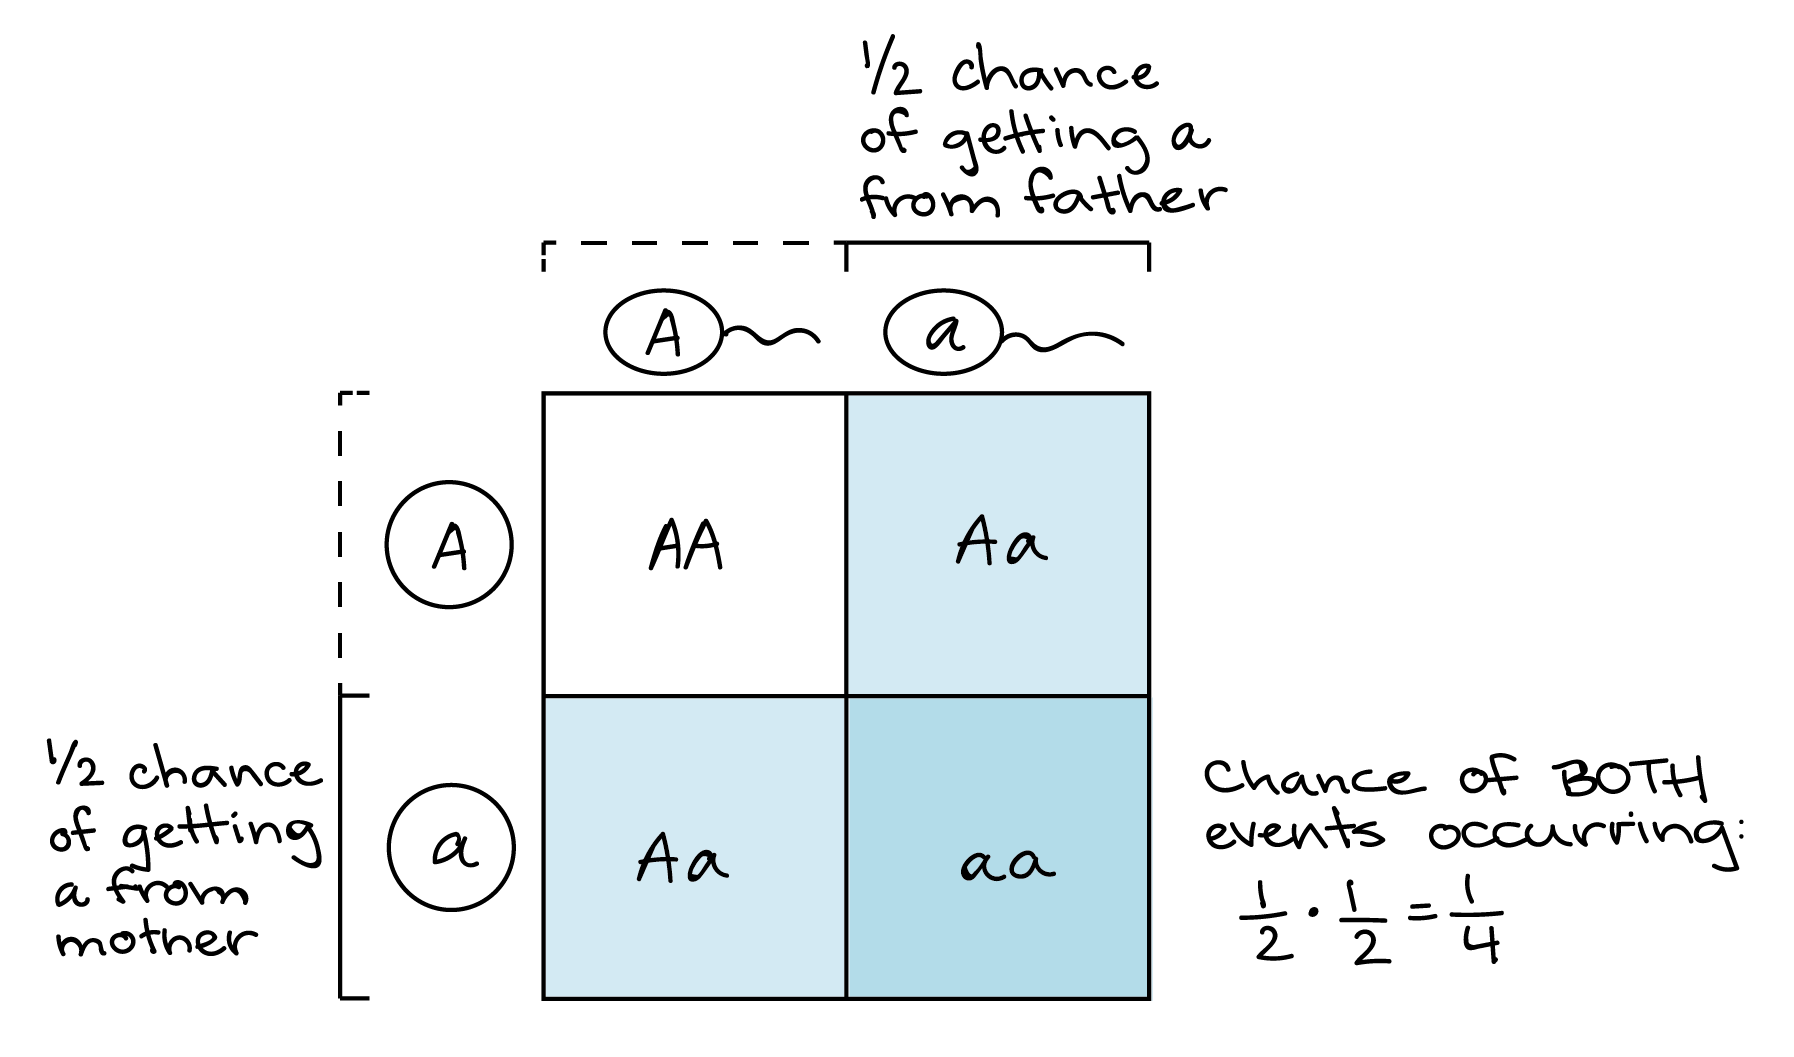

## Mendelian traits
- The simplest traits behave like Mendel's peas:
    - Lactase persistence
    - Albinism
    - Huntington's disease
    - ([Full list](https://en.wikipedia.org/wiki/Mendelian_traits_in_humans)])

- However, many traits have a much more complex "architecture", and are affected by thousands of genetic variants scattered throughout the genome.


- Height is one such example; schizophrenia is another.

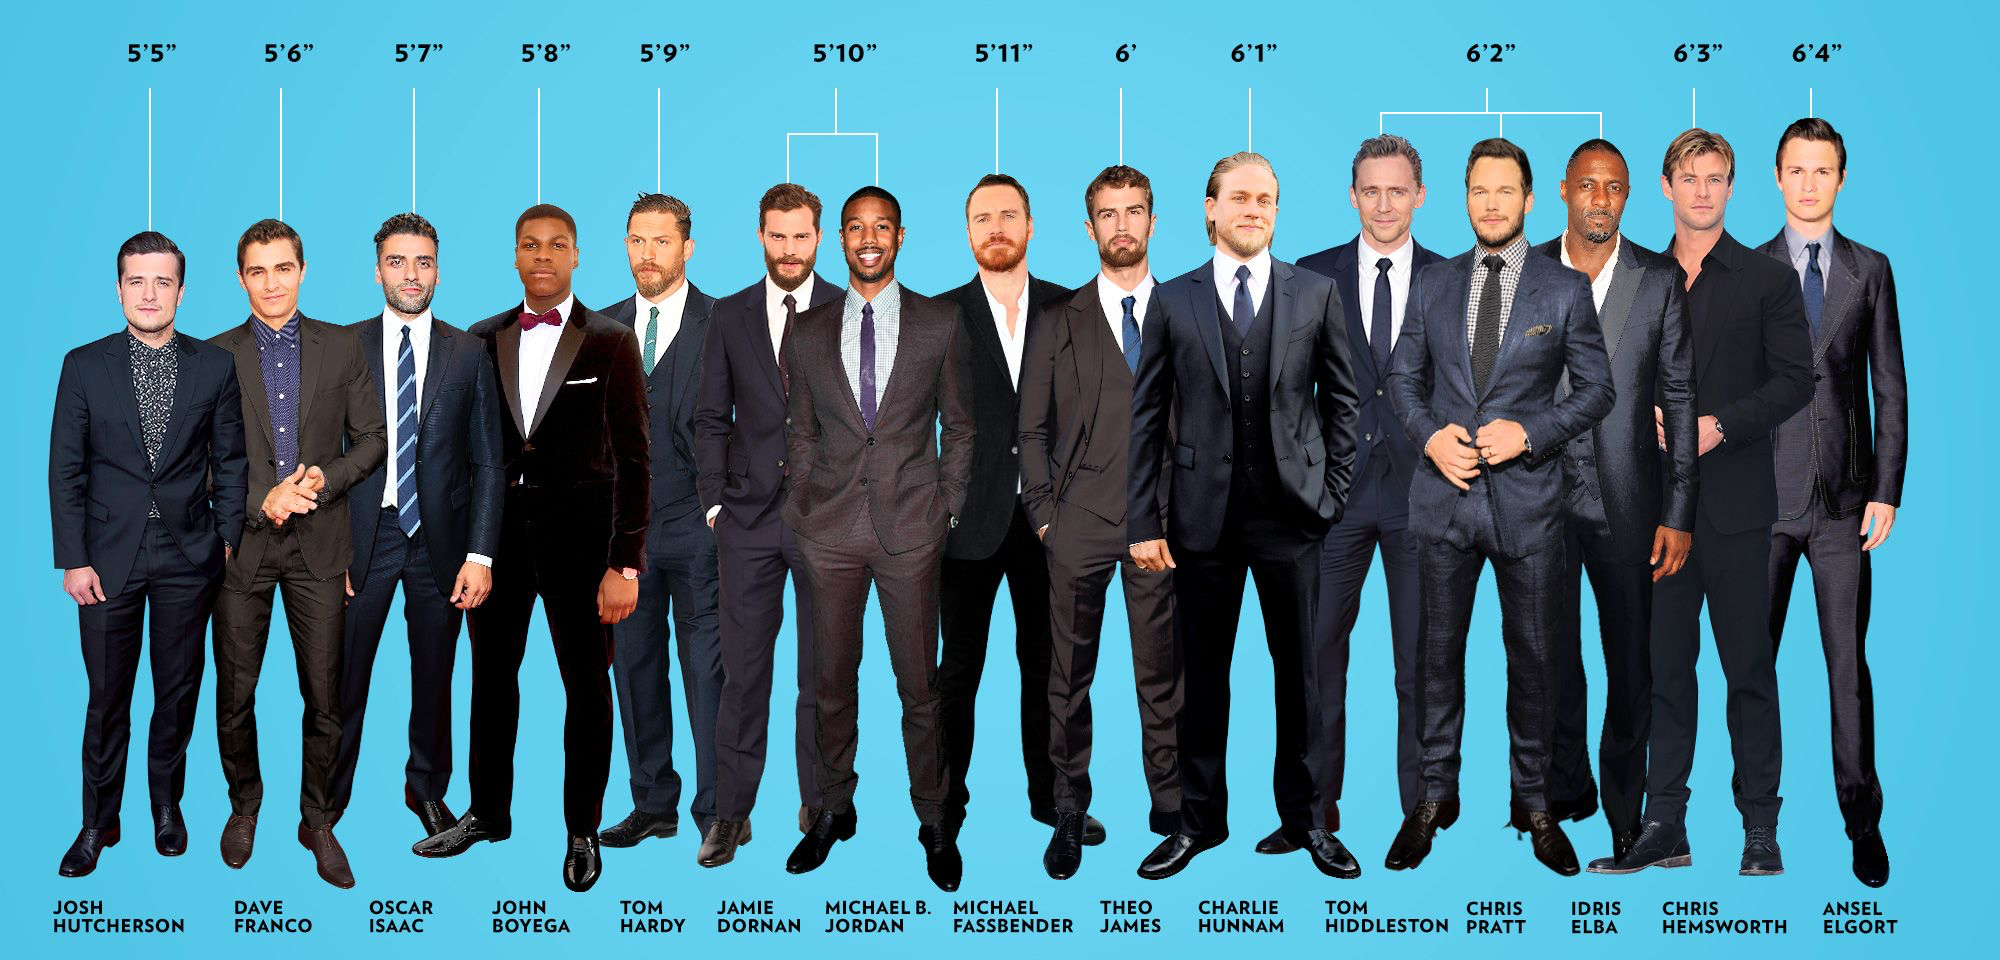

## GWAS
- If we have gene sequences from many different people ($X$), as well as corresponding trait information ($y$), we might try regression to understand the genetic architecture:

$$\underbrace{y}_{\text{height, disease status, etc.}} = \underbrace{\mathbf{X}}_{\text{genotype}}\cdot \beta + \epsilon$$

- This is called a **genomewide association study** (GWAS).
- GWAS explains the primary effect of DNA mutations on phenotypes of interest.
- However, the picture is more complicated...

## DNA, RNA, Proteins

How does genetic code translate into phenotype (observable trait)? This is called the **central dogma of molecular biology**:


![complex traits](https://cdn.kastatic.org/ka-perseus-images/53b7ece60303244264411d03bfbe55d36312b64e.png)

## The central dogma

Notice in the above figure that there is a step (in fact, multiple steps) "between" the genetic code and the ultimate phenotype. In fact the process by which "your code" becomes "you" is quite complicated. It is known as the **central dogma of molecular biology**:

$$\text{DNA} \longrightarrow \text{RNA} \longrightarrow \text{protein} (\longrightarrow \cdots \longrightarrow \text{trait})$$

### Variation in the steps along this pathway generates all<sup>*</sup> the diversity of life.


<span style="font-size: 80%">*: Environmental factors also play a role.</span>

### Cells

<img src="images/Animal_cell.png" width="80%" class="center">

### DNA, RNA, Proteins

<img src="images/central_dogma.jpg" width="30%" class="center">

### DNA, RNA, Proteins

<img src="images/protein_synthesis.png" width="65%" class="center">

Summarizing:

* Each cell has two full copies of your DNA (one from each parent).
* Some, **but not all**, genes will get transcribed to mRNA
  * The **amount** (*expression*) of mRNA can differ dramatically from gene to gene.
  * Gene expression varies from cell to cell.
  * Gene expression varies over time within a cell.
* The mRNA gets tranlsated to proteins:
  * The proteins "do stuff".
  * Structural: pores in the cell membrane, microfillaments, etc.
  * Chemical: catalyze reactions, etc.
  
**All of these steps together govern the final outcome.**

### Regulation

* The process of 
$\text{DNA} \longrightarrow \text{RNA} \longrightarrow \text{protein}$
is highly regulated.
* Gene expression can be upregulated or downregulated, e.g., via various feedback loops within the cell.
* Understanding how gene expression works is key to further understand how complex traits evolve and are governed.
    - Many diseases, including certain cancers, are driven by changes in gene expression.
    - By knowing which genes are turned on or off by a particular treatment, researchers can develop more targeted and effective drugs.
* Despite a two centuries of progress, **we still know surprisingly little about the architecture of the genome**.

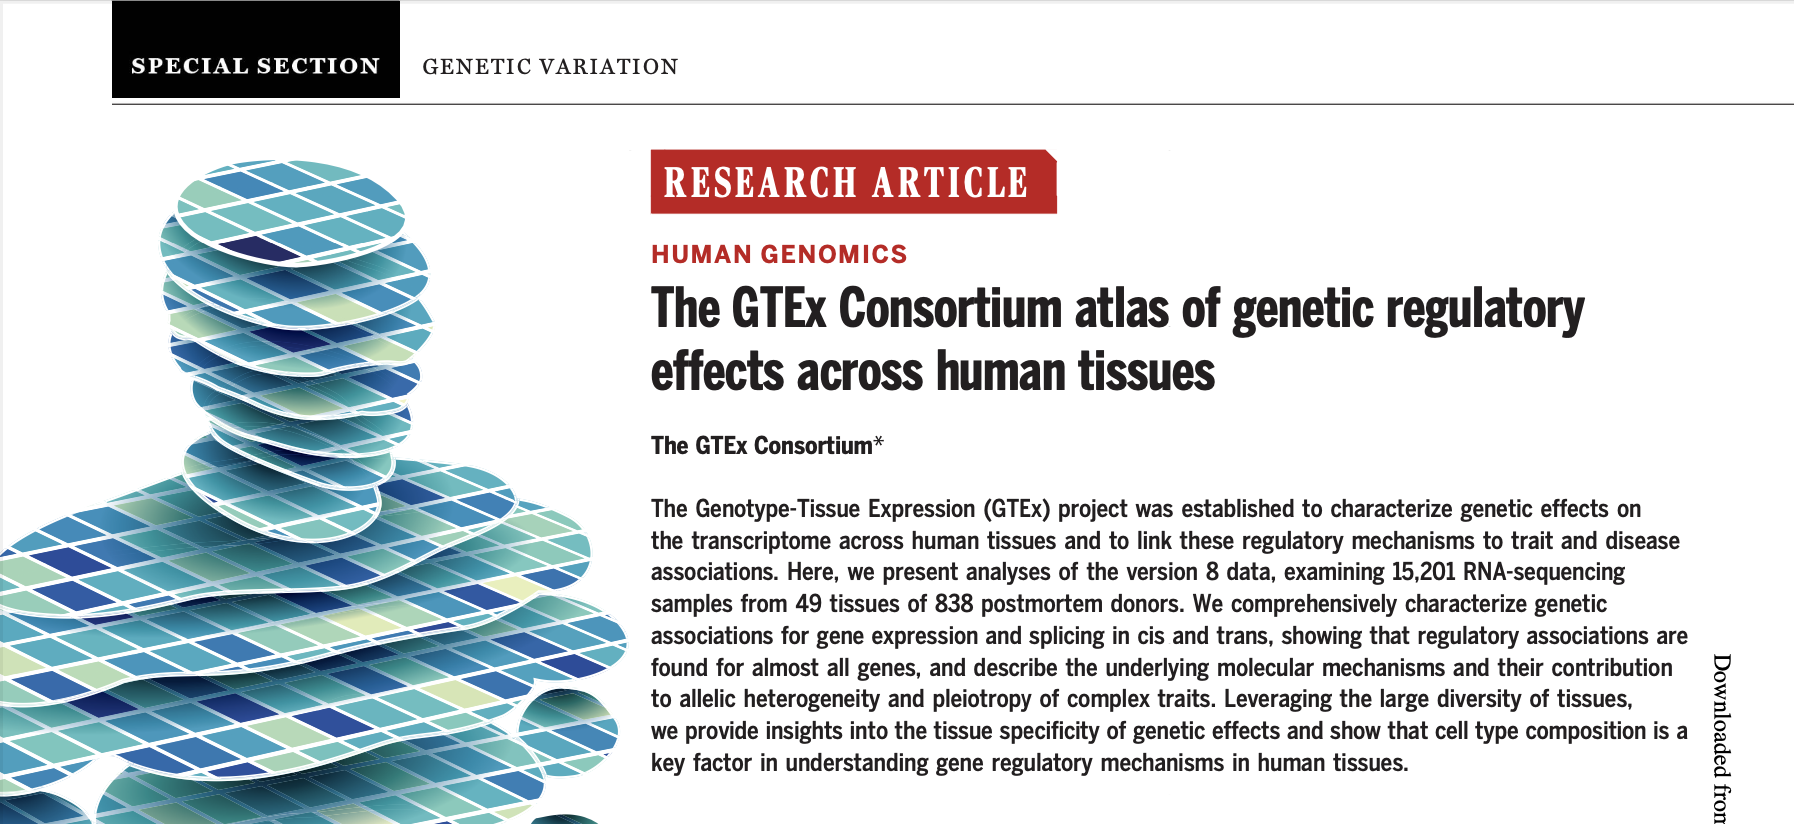

## 🤔 Discussion

- What is the point of this paper? Why is it in Science?
- Did you find it easy or hard to read?
- What is/are their main results? Do you find their conclusions convincing?
- How was the data collected? What are some potential limitations of the study design?

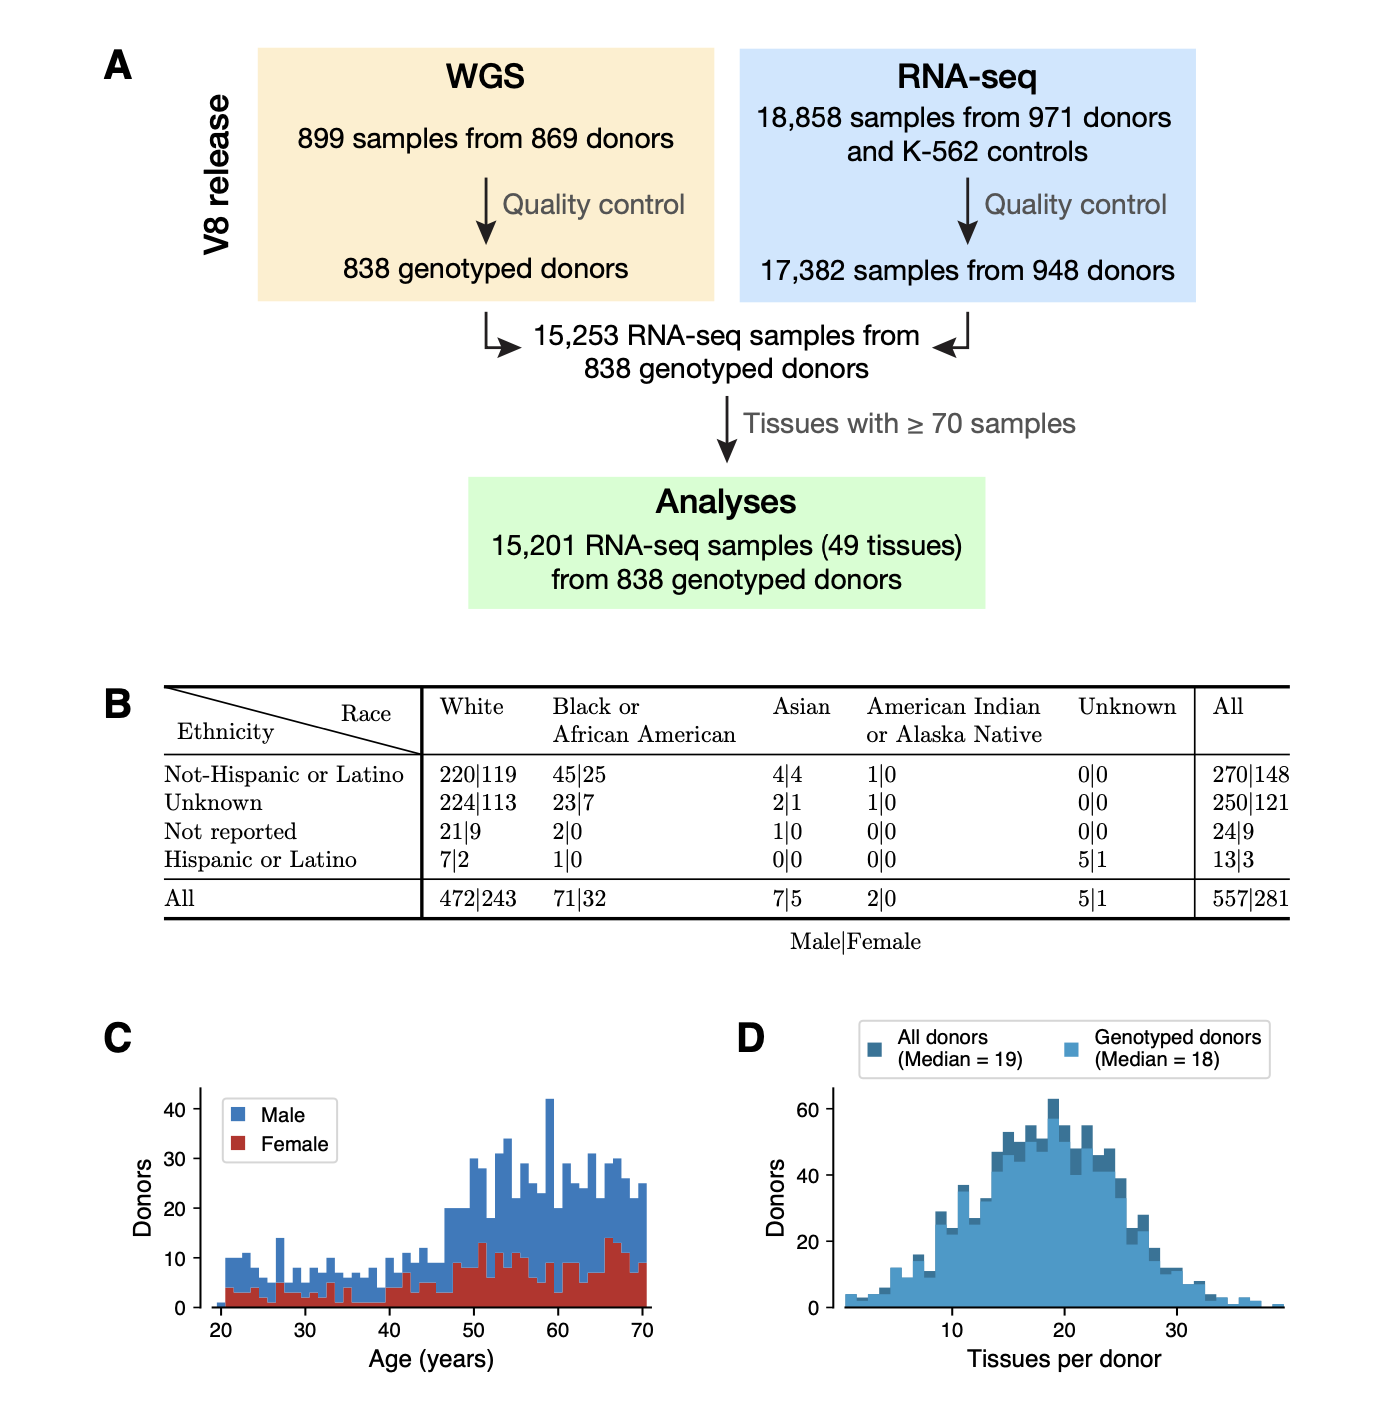

## Working with the GTEx data

- Most of the data is freely available at the [GTEx Portal](https://www.gtexportal.org/home/).
- For privacy reasons, access to the raw data controlled. We'll work with the summarized data.

### Individual-level phenotypes
(restricted due to privacy)

In [24]:
library(tidyverse)
base_url <- "https://storage.googleapis.com/gtex_analysis_v8"
pheno_url <- str_c(base_url, "/annotations/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt")
download.file(pheno_url, "phenotypes.txt")
donors_df <- read_delim("phenotypes.txt") %>% print

Rows: 980 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): SUBJID, AGE
dbl (2): SEX, DTHHRDY

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 980 × 4
   SUBJID       SEX AGE   DTHHRDY
   <chr>      <dbl> <chr>   <dbl>
 1 GTEX-1117F     2 60-69       4
 2 GTEX-111CU     1 50-59       0
 3 GTEX-111FC     1 60-69       1
 4 GTEX-111VG     1 60-69       3
 5 GTEX-111YS     1 60-69       0
 6 GTEX-1122O     2 60-69       0
 7 GTEX-1128S     2 60-69       2
 8 GTEX-113IC     1 60-69      NA
 9 GTEX-113JC     2 50-59       2
10 GTEX-117XS     1 60-69       2
# … with 970 more rows


In [15]:
samples_url <- str_c(base_url, "/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt") 
download.file(samples_url, "samples.txt")
samples_df <- read_delim("samples.txt") %>% print

Rows: 22951 Columns: 63
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (14): SAMPID, SMCENTER, SMPTHNTS, SMTS, SMTSD, SMUBRID, SMNABTCH, SMNABT...
dbl (41): SMATSSCR, SMRIN, SMTSISCH, SMTSPAX, SME2MPRT, SMCHMPRS, SMNTRART, ...
lgl  (8): SMNUMGPS, SM550NRM, SM350NRM, SMMNCPB, SMMNCV, SMCGLGTH, SMGAPPCT,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 22,951 × 63
   SAMPID      SMATS…¹ SMCEN…² SMPTH…³ SMRIN SMTS  SMTSD SMUBRID SMTSI…⁴ SMTSPAX
   <chr>         <dbl> <chr>   <chr>   <dbl> <chr> <chr> <chr>     <dbl>   <dbl>
 1 GTEX-1117F…      NA B1      NA       NA   Blood Whol… 0013756    1188      NA
 2 GTEX-1117F…      NA B1      NA       NA   Blood Whol… 0013756    1188      NA
 3 GTEX-1117F…      NA B1      NA       NA   Blood Whol… 0013756    1188      NA
 4 GTEX-1117F…      NA B1, A1  NA       NA   Brain Brai… 0009834    1193      NA
 5 GTEX-1117F…      NA B1, A1  NA        7.2 Brain Brai… 0009834    1193      NA
 6 GTEX-1117F…       0 B1      2 piec…   6.8 Adip… Adip… 0002190    1214    1125
 7 GTEX-1117F…       0 B1      2 piec…   7.1 Musc… Musc… 0011907    1220    1119
 8 GTEX-1117F…       0 B1      2 piec…   8   Bloo… Arte… 0007610    1221    1120
 9 GTEX-1117F…       1 B1      2 piec…   6.9 Bloo… Arte… 0001621    1243    1098
10 GTEX-1117F…       1 B1      2 piec…   6.3 Heart Hear… 0006631    1244    1097
# … 

For this lab we'll focus on the RNA-seq samples:

In [17]:
rnaseq_df <- samples_df %>% filter(SMAFRZE == "RNASEQ") %>% print

# A tibble: 17,382 × 63
   SAMPID      SMATS…¹ SMCEN…² SMPTH…³ SMRIN SMTS  SMTSD SMUBRID SMTSI…⁴ SMTSPAX
   <chr>         <dbl> <chr>   <chr>   <dbl> <chr> <chr> <chr>     <dbl>   <dbl>
 1 GTEX-1117F…       0 B1      2 piec…   6.8 Adip… Adip… 0002190    1214    1125
 2 GTEX-1117F…       0 B1      2 piec…   7.1 Musc… Musc… 0011907    1220    1119
 3 GTEX-1117F…       0 B1      2 piec…   8   Bloo… Arte… 0007610    1221    1120
 4 GTEX-1117F…       1 B1      2 piec…   6.9 Bloo… Arte… 0001621    1243    1098
 5 GTEX-1117F…       1 B1      2 piec…   6.3 Heart Hear… 0006631    1244    1097
 6 GTEX-1117F…       1 B1      2 piec…   5.9 Adip… Adip… 0010414    1277    1066
 7 GTEX-1117F…       1 B1      1 piec…   6.3 Uter… Uter… 0000995    1332    1014
 8 GTEX-1117F…       2 B1      6  pie…   6.5 Vagi… Vagi… 0000996    1329    1017
 9 GTEX-1117F…       1 B1      2 piec…   5.8 Brea… Brea… 0008367    1340    1008
10 GTEX-1117F…       0 B1      6 piec…   7.7 Skin  Skin… 0036149    1341    1006
# … 

The `SMTSD` stands for 'Tissue Site Detail'. It tells us which tissue each of the samples was collected from:

In [23]:
rnaseq_df %>% count(SMTSD) %>% top_n(5)

Selecting by n


SMTSD,n
<chr>,<int>
Adipose - Subcutaneous,663
Artery - Tibial,663
Muscle - Skeletal,803
Skin - Sun Exposed (Lower leg),701
Whole Blood,755


The first two components of the sample ID are the donor ID. So, to find e.g. all whole blood samples from the male subjects, we could use the query:

In [69]:
rnaseq_df %>% 
    mutate(SUBJID = map_chr(SAMPID, \(s) str_c(str_split(s, "-", simplify = T)[1:2], collapse="-"))) %>% 
    left_join(donors_df) %>% 
    filter(SEX == 1, SMTSD == "Whole Blood") %>% 
    print

Joining with `by = join_by(SUBJID)`


# A tibble: 501 × 67
   SAMPID      SMATS…¹ SMCEN…² SMPTH…³ SMRIN SMTS  SMTSD SMUBRID SMTSI…⁴ SMTSPAX
   <chr>         <dbl> <chr>   <chr>   <dbl> <chr> <chr> <chr>     <dbl>   <dbl>
 1 GTEX-111YS…      NA B1      NA        8.2 Blood Whol… 0013756    -121      NA
 2 GTEX-113IC…      NA B1      NA        8.6 Blood Whol… 0013756    -351      NA
 3 GTEX-117XS…      NA B1      NA        6.4 Blood Whol… 0013756     802      NA
 4 GTEX-117YW…      NA B1      NA        8.5 Blood Whol… 0013756     771      NA
 5 GTEX-1192W…      NA B1      NA        8   Blood Whol… 0013756     645      NA
 6 GTEX-1192X…      NA B1      NA        8.3 Blood Whol… 0013756     757      NA
 7 GTEX-11DXW…      NA C1      NA        8.5 Blood Whol… 0013756    1076      NA
 8 GTEX-11DXY…      NA B1      NA        8.4 Blood Whol… 0013756     867      NA
 9 GTEX-11DXZ…      NA B1      NA        9.2 Blood Whol… 0013756     -43      NA
10 GTEX-11DYG…      NA C1      NA        8.1 Blood Whol… 0013756     673      NA
# … wit

## Expression data
Expression data are expressed as [TPM](https://academic.oup.com/bioinformatics/article/26/4/493/243395?login=true) (transcripts per million). (Higher means more expression.)

In [67]:
#  rna_seq <- str_c(base_url, '/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz')
#  download.file(rna_seq, 'gene_tpm.gct.gz')  # warning: large

rna_seq <- str_c(base_url, '/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz')
download.file(rna_seq, 'gene_tpm.gct.gz')
gene_tpm_df <- read_delim("gene_tpm.gct.gz", skip=2)

Rows: 56200 Columns: 56
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): Name, Description
dbl (54): Adipose - Subcutaneous, Adipose - Visceral (Omentum), Adrenal Glan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
gene_tpm_df %>% head

Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,⋯,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.0000000,0.00000,0.00000,0.00000,0.0000000,0.0000000,⋯,0.0000000,0.00000,0.0000000,0.00000,0.0000000,0.1664030,0.00000,0.00000,0.00000,0.00000
ENSG00000227232.5,WASH7P,4.06403,3.37111,2.6854900,4.04762,3.90076,3.63963,5.1637500,1.4385900,⋯,5.9329800,6.13265,4.1937800,5.92631,3.0624800,4.7025300,6.27255,7.19001,5.74554,2.64743
ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.0000000,0.00000,0.00000,0.00000,0.0000000,0.0000000,⋯,0.0000000,0.00000,0.0000000,0.00000,0.0000000,0.0000000,0.00000,0.00000,0.00000,0.00000
ENSG00000243485.5,MIR1302-2HG,0.00000,0.00000,0.0000000,0.00000,0.00000,0.00000,0.0000000,0.0000000,⋯,0.0000000,0.00000,0.0000000,0.00000,0.0000000,0.0542228,0.00000,0.00000,0.00000,0.00000
ENSG00000237613.2,FAM138A,0.00000,0.00000,0.0000000,0.00000,0.00000,0.00000,0.0000000,0.0000000,⋯,0.0000000,0.00000,0.0000000,0.00000,0.0000000,0.0000000,0.00000,0.00000,0.00000,0.00000
ENSG00000268020.3,OR4G4P,0.00000,0.00000,0.0363952,0.00000,0.00000,0.00000,0.0354698,0.0496721,⋯,0.0267156,0.00000,0.0354079,0.00000,0.0325904,0.0000000,0.00000,0.00000,0.00000,0.00000


##  Project 1

This project is designed to practice **exploratory data analysis**. Imagine that:

* You are the statistical collaborator to the lab that produced this data.
* The experiment just completed, and the data just became available.
* You have been given the data, and been asked to take a look at it.
* You will be presenting at group meeting in two weeks.

As you poke around this data set, keep an eye out for:
* Potential problems with the data.
* Anything odd or unexpected.
* Challenges the data will pose (possibly unanticipated).
* Anything especially interesting.
* Initial findings.
* Suggestions for future runs of the experiment.

Additional notes:

* Insightful data visualization is important.
* Fancy models (or any models) are not needed.
* The overall goal is *insight* -- into the data, into the experimental methodology, into the science.

## Deliverables
- An 8-10 page writeup describing the data, what analyses you performed, and your findings, due two weeks from yesterday.
- A brief (not to exceed 15m) presentation summarizing your results, given in class in two weeks.
- Groups of three students have been randomly assigned on Canvas.
- It's okay to divide up the work, as long as everyone does roughly an equal amount of work.